### 1. y= (x+3)^3 의 미분과정

## dy/dx = 3 * (x+3)^ 2 * (1) 

### 2. x= [1,2,3,4,5,6,7]; y=[5,8,11,14,17,20,23]인 경우 W와 b는?

### 2.1 직접구현

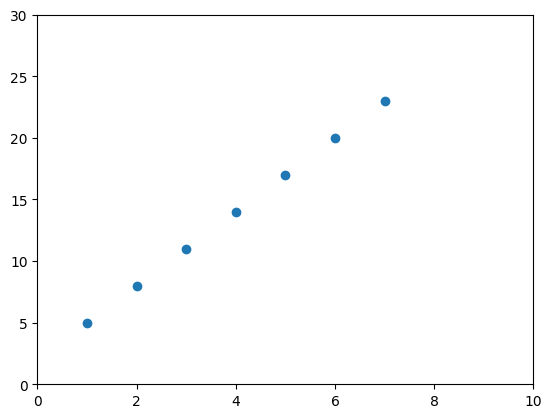

w= 6.5600004 b= 9.28 gradientW= 344.0 gradientB= 72.0 mse= 1492.0
w= 2.1339443 b= 6.288656 gradientW= -0.33426613 gradientB= 1.6552304 mse= 3.7083619
w= 2.4108176 b= 4.917597 gradientW= -0.22739466 gradientB= 1.126064 mse= 1.7162869
w= 2.5991757 b= 3.984859 gradientW= -0.15470178 gradientB= 0.7660675 mse= 0.7943261
w= 2.7273169 b= 3.350311 gradientW= -0.105245315 gradientB= 0.5211601 mse= 0.36762697
w= 2.814492 b= 2.9186244 gradientW= -0.071596965 gradientB= 0.3545483 mse= 0.17014332
w= 2.873798 b= 2.624946 gradientW= -0.04870483 gradientB= 0.24120235 mse= 0.07874534
w= 2.914144 b= 2.4251542 gradientW= -0.033129554 gradientB= 0.16409193 mse= 0.036444448
w= 2.9415915 b= 2.289235 gradientW= -0.022537367 gradientB= 0.11163317 mse= 0.01686716
w= 2.9602642 b= 2.196769 gradientW= -0.015335356 gradientB= 0.07594436 mse= 0.007806447
w= 2.9729679 b= 2.133862 gradientW= -0.010435513 gradientB= 0.05166449 mse= 0.0036129032
w= 2.9816098 b= 2.091068 gradientW= -0.007095337 gradientB= 0.03514862 mse

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Common data preparation 
x_data = np.array([1,2,3,4,5,6,7])
y_data = np.array([5,8,11,14,17,20,23])

# Common hyper parameter setting
epoch  = 1000
step   =  100

x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)
plt.xlim( 0,10 )
plt.ylim( 0,30 )
plt.scatter( x, y)
plt.show()
w = 10
b = 10
epochs = 2000
learning_rate = 0.01
n = len(x)
for i in range( epochs ):
    hx = w*x + b
    c = tf.reduce_sum( (hx-y)**2)/n
    gradientW = tf.reduce_sum( (w*x + b-y)*2*x)/n
    gradientB = tf.reduce_sum( (w*x + b-y)*2 )/n
    w = w-learning_rate*gradientW
    b = b-learning_rate*gradientB
    if (i % step == 0):
        print( 'w=',w.numpy(),'b=',b.numpy(), 'gradientW=',gradientW.numpy(),
              'gradientB=',gradientB.numpy(), 'mse=', c.numpy() )    
print( '최종:w',w.numpy(), '최종:b', b.numpy() )

### 2.2 텐서라이브리사용버전

In [15]:
from tensorflow.keras.optimizers import SGD

w = tf.Variable( 10.0, tf.float32)
b = tf.Variable( 10.0, tf.float32)

def compute_loss():
    hx = w*x + b
    c = tf.reduce_mean( (hx-y)**2)
    return c

optimizer = SGD( learning_rate=0.01 )

for i in range(epoch):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    if (i % step == 0):
        print( i, 'w=',w.numpy(),'b=',b.numpy(), 'cost=', c )    
    

0 w= 6.5599995 b= 9.28 cost= 513.8046
100 w= 2.1339443 b= 6.288656 cost= 3.6799016
200 w= 2.4108176 b= 4.917597 cost= 1.7031155
300 w= 2.5991757 b= 3.984859 cost= 0.78823006
400 w= 2.7273169 b= 3.350311 cost= 0.36480564
500 w= 2.814492 b= 2.9186244 cost= 0.16883758
600 w= 2.873798 b= 2.624946 cost= 0.07814093
700 w= 2.914144 b= 2.4251542 cost= 0.0361649
800 w= 2.9415915 b= 2.289235 cost= 0.01673771
900 w= 2.9602642 b= 2.196769 cost= 0.007746474


### 2.3 x=10 인경우 예측값

In [18]:
x_pred = tf.constant( [10], tf.float32)
y_pred = w*x_pred + b
print("y_pred =",y_pred.numpy())

y_pred = [31.863012]
